# <font color='cyan'> Data Exploration with Python

### Dataset Overview Type 2 Diabetes (T2D)

Type 2 Diabetes (T2D) is a chronic metabolic condition that affects how your body processes blood sugar (glucose). Unlike Type 1 Diabetes, where the body doesn't produce insulin, people with T2D either do not produce enough insulin or their cells become resistant to insulin. This results in high blood sugar levels, which can lead to serious health complications over time.

In [1]:
# Importing the necessary libraries for data exploration
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical computations and array operations
import matplotlib.pyplot as plt  # For creating static visualizations (plots)
import seaborn as sns        # For statistical data visualization, built on top of Matplotlib
from scipy.stats import pearsonr  # For statistical analysis (Pearson correlation)



In [2]:
data = pd.read_csv('/home/labs/hornsteinlab/hadarkl/Hadar/primals/code/ML_course/T2D_Dataset.csv').set_index('PatientID')

In [3]:
data.to_excel('t2d_df.xlsx', index= True)

In [52]:
data.head()

,Age,"Gender (Male=0, Female=1)","Disease Status (Healthy=0, T2D=1)",BMI,Blood_Glucose,Cholesterol_Level,Sleep_Duration
PatientID,,,,,,,
1,63,1,0,26.239883,53.350236,224.463882,7
2,50,1,0,38.915715,74.841356,401.139014,10
3,59,1,0,34.103867,69.125341,337.677251,8
4,62,1,0,31.170487,42.465284,317.408373,5
5,57,0,0,21.432410,40.668101,204.885706,9


In [53]:
data.describe()

,Age,"Gender (Male=0, Female=1)","Disease Status (Healthy=0, T2D=1)",BMI,Blood_Glucose,Cholesterol_Level,Sleep_Duration
count,100.0000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,51.5700,0.540000,0.290000,28.343976,56.677149,284.199057,6.95000
std,11.4188,0.500908,0.456048,6.544767,14.794350,69.539782,1.76598
min,30.0000,0.000000,0.000000,18.121487,26.125834,120.386619,4.00000
25%,43.7500,0.000000,0.000000,22.250417,45.179398,224.035623,5.00000
50%,53.0000,1.000000,0.000000,28.211134,54.999928,271.058692,7.00000
75%,61.0000,1.000000,1.000000,34.064469,67.097964,344.692247,8.00000
max,70.0000,1.000000,1.000000,39.711513,92.634296,420.430980,10.00000


In [54]:
data.shape

(100, 7)

### Distributions with histograms(matplotlib.pyplot)

A histogram is a graphical representation of the distribution of a numerical dataset. It is used to visualize the frequency of data points within different intervals or bins. In a histogram, the x-axis represents the range of values (e.g., age, height, or BMI), and the y-axis shows how many times each range or bin appears in the data.

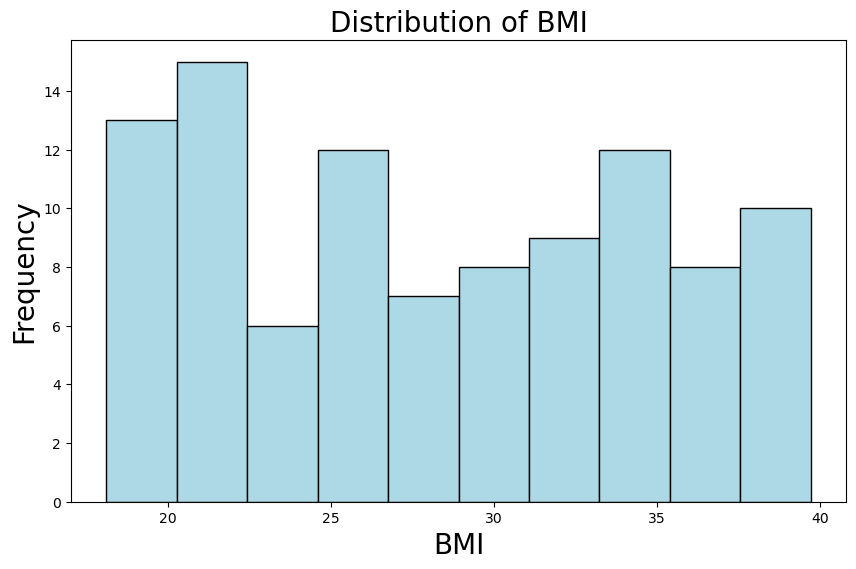

In [55]:

# Generate a histogram for BMI
plt.figure(figsize=(10, 6))
plt.hist(data['BMI'], bins=10, color='lightblue', edgecolor='black')  # Create histogram
plt.title('Distribution of BMI', size = 20)  # Title of the plot
plt.xlabel('BMI', size = 20)  # Label for the x-axis
plt.ylabel('Frequency', size = 20)  # Label for the y-axis
plt.show()  # Display the plot



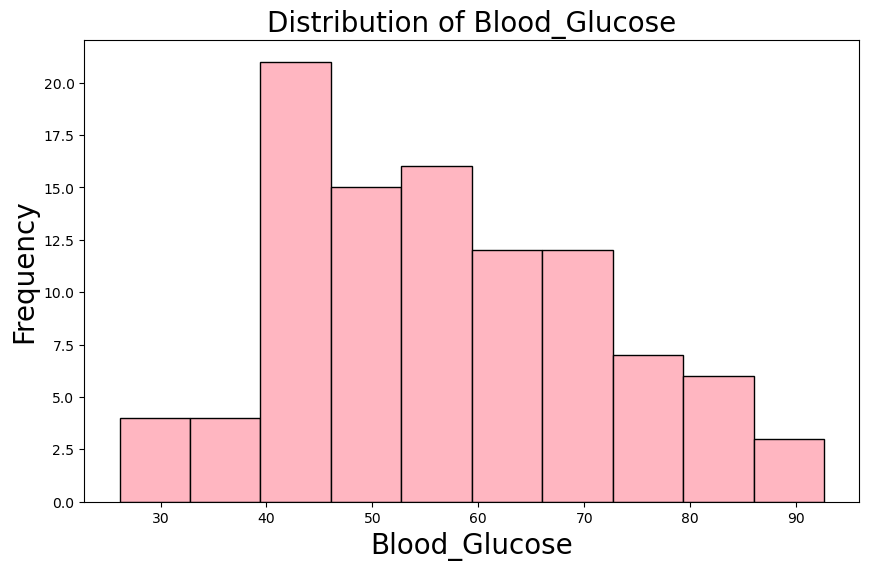

In [56]:

# Generate a histogram for Blood_Glucose
plt.figure(figsize=(10, 6))
plt.hist(data['Blood_Glucose'], bins=10, color='lightpink', edgecolor='black')  # Create histogram
plt.title('Distribution of Blood_Glucose', size = 20)  # Title of the plot
plt.xlabel('Blood_Glucose', size = 20)  # Label for the x-axis
plt.ylabel('Frequency', size = 20)  # Label for the y-axis
plt.show()  # Display the plot


### Pearson correlation

Pearson Correlation is a statistical measure that quantifies the linear relationship between two continuous variables. It tells us how strongly the two variables are related and whether the relationship is positive or negative.

In [57]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(data['BMI'], data['Blood_Glucose'])
print(f'Correlation: {correlation}, P-value: {p_value}')


Correlation: 0.7923131193506836, P-value: 9.421233631006228e-23


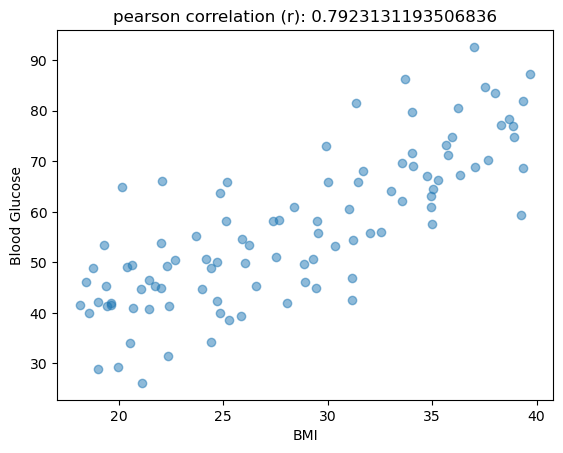

In [58]:
plt.scatter(data['BMI'], data['Blood_Glucose'], alpha=0.5)
plt.title(f'pearson correlation (r): {correlation}')
plt.xlabel('BMI')
plt.ylabel('Blood Glucose')
plt.show()


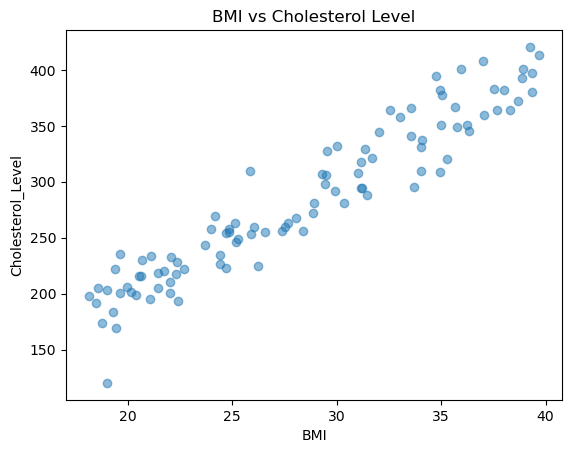

In [59]:
plt.scatter(data['BMI'], data['Cholesterol_Level'], alpha=0.5)
plt.title('BMI vs Cholesterol Level')
plt.xlabel('BMI')
plt.ylabel('Cholesterol_Level')
plt.show()


### Independent T-test (for comparing two independent groups)

An **Independent T-test** is used to determine whether there is a significant difference between the **means** of two independent groups. These groups are not related in any way. For example, you might use this test to compare the **Blood Glucose levels** of **males** vs **females**.

### Key Concepts

- **Null Hypothesis (H₀)**: The means of the two groups are equal (i.e., no significant difference).
- **Alternative Hypothesis (H₁)**: The means of the two groups are not equal (i.e., a significant difference).
  
### T-statistic:
The T-statistic quantifies how much the group means differ relative to the variability (spread) within the groups.

### P-value:
- **P-value < 0.05**: There is a **significant difference** between the groups.
- **P-value ≥ 0.05**: There is **no significant difference** between the groups.



We can use **SciPy** to perform the Independent T-test. Here's an example comparing **Blood Glucose levels** between **male** and **female** groups:

```python


In [60]:
male_data = data[data['Gender (Male=0, Female=1)'] == 0]
female_data = data[data['Gender (Male=0, Female=1)'] == 1]

In [61]:
male_data.shape

(46, 7)

In [62]:
female_data.shape

(54, 7)

## glu level t test

In [63]:
male_data_glu = male_data['Blood_Glucose']
female_data_glu = female_data['Blood_Glucose']

In [64]:
from scipy.stats import ttest_ind
# Perform the t-test
t_stat, p_value = ttest_ind(male_data_glu, female_data_glu)

# Print the t-statistic and p-value
print(f"T-statistic: {t_stat}, P-value: {p_value}")



T-statistic: -0.6542634228775275, P-value: 0.5144745893588112


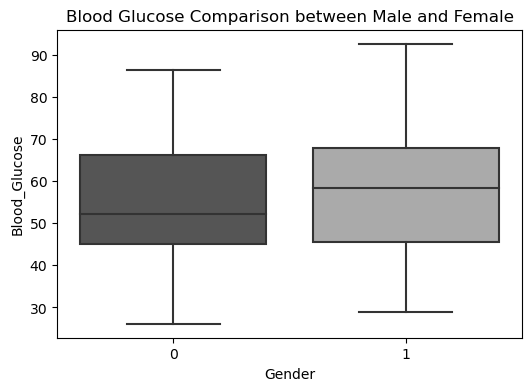

In [65]:
# Plotting a box plot for Blood Glucose between Male and Female groups without color
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['Gender (Male=0, Female=1)'], y=data['Blood_Glucose'], palette='gray')
plt.title('Blood Glucose Comparison between Male and Female')
plt.xlabel('Gender')
plt.show()


In [66]:
sick_data = data[data['Disease Status (Healthy=0, T2D=1)'] == 1]
healthy_data = data[data['Disease Status (Healthy=0, T2D=1)'] == 0]

In [67]:
sick_data.shape

(29, 7)

In [68]:
healthy_data.shape

(71, 7)

In [69]:
sick_data_glu = sick_data['Blood_Glucose']
healthy_data_glu = healthy_data['Blood_Glucose']

## change the data

In [70]:
# Perform the t-test
t_stat, p_value = ttest_ind(sick_data_glu, healthy_data_glu)

# Print the t-statistic and p-value
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 0.23020400679325087, P-value: 0.8184130948497208


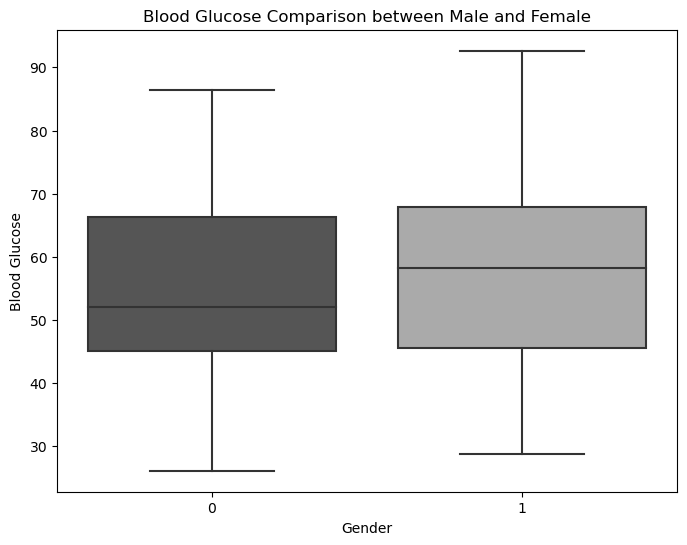

In [71]:
# Plotting a box plot for Blood Glucose between Male and Female groups without color
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Gender (Male=0, Female=1)'], y=data['Blood_Glucose'], palette='gray')
plt.title('Blood Glucose Comparison between Male and Female')
plt.xlabel('Gender')
plt.ylabel('Blood Glucose')
plt.show()

# task


In [72]:
#distribution of male and femal 

In [73]:
# t sest 